In [6]:
#!pip install xgboost

In [1]:
import requests
from urllib.request import urlopen
import json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score, mean_absolute_error

In [2]:
Congestion_data = pd.read_csv('df_rt_2022.csv')
Congestion_data

,ID,SPEED,TRAVEL_TIME,STATUS,DATA_AS_OF,LINK_ID,LINK_POINTS,BOROUGH,LINK_NAME
0,345,7.45,567,-101,2022-01-01 00:03:10,4620314,"40.85526,-73.918591 40.85266,-73.92085 40.8500...",Bronx,MDE S HARLEM RIVER PARK - GWB W AMSTERDAM AVEN...
1,325,9.32,569,-101,2022-01-01 00:03:10,4329472,"40.75829,-73.997531 40.7605,-74.0032 40.762060...",Manhattan,LINCOLN TUNNEL E SOUTH TUBE - NJ - NY
2,324,8.69,627,-101,2022-01-01 00:03:10,4329473,"40.7578106,-73.996801 40.7604506,-74.003221 40...",Manhattan,LINCOLN TUNNEL E CENTER TUBE NJ - NY
3,440,50.95,151,0,2022-01-01 00:03:10,4329483,"40.5264504,-74.27001 40.52568,-74.267851 40.52...",Staten Island,WSE S TYRELLAN AVENUE - 440 S FRANCIS STREET
4,329,0.00,0,-101,2022-01-01 00:03:10,4329508,"40.75766,-73.99687 40.7604,-74.00328 40.76197,...",Manhattan,LINCOLN TUNNEL W CENTER TUBE NY - NJ
...,...,...,...,...,...,...,...,...,...
9927132,378,52.19,51,0,2022-12-31 23:59:11,4616197,"40.6210105,-74.168861 40.6207604,-74.168 40.61...",Staten Island,SIE E SOUTH AVENUE - RICHMOND AVENUE
9927133,350,0.00,0,-101,2022-12-31 23:59:11,4616196,"40.63092,-74.14592 40.62975,-74.14593 40.62877...",Staten Island,MLK S - SIE E WALKER STREET - WOOLEY AVENUE
9927134,377,52.19,75,0,2022-12-31 23:59:11,4616195,"40.61486,-74.15738 40.60931,-74.15012 40.60846...",Staten Island,SIE E RICHMOND AVENUE - WOOLEY AVENUE
9927135,383,0.00,0,-101,2022-12-31 23:59:11,4616217,"40.6167105,-74.15242 40.61572,-74.15276 40.614...",Staten Island,SIE W - MLK N WOOLEY AVENUE - WLAKER STREET


In [3]:
Congestion_data = Congestion_data[Congestion_data['SPEED'] <= 30]
Congestion_data = Congestion_data[Congestion_data['TRAVEL_TIME'] > 0]
Congestion_data

,ID,SPEED,TRAVEL_TIME,STATUS,DATA_AS_OF,LINK_ID,LINK_POINTS,BOROUGH,LINK_NAME
0,345,7.45,567,-101,2022-01-01 00:03:10,4620314,"40.85526,-73.918591 40.85266,-73.92085 40.8500...",Bronx,MDE S HARLEM RIVER PARK - GWB W AMSTERDAM AVEN...
1,325,9.32,569,-101,2022-01-01 00:03:10,4329472,"40.75829,-73.997531 40.7605,-74.0032 40.762060...",Manhattan,LINCOLN TUNNEL E SOUTH TUBE - NJ - NY
2,324,8.69,627,-101,2022-01-01 00:03:10,4329473,"40.7578106,-73.996801 40.7604506,-74.003221 40...",Manhattan,LINCOLN TUNNEL E CENTER TUBE NJ - NY
9,344,20.50,218,0,2022-01-01 00:03:10,4620330,"40.85513,-73.91865 40.8526305,-73.920881 40.85...",Bronx,MDE S HARLEM RIVER PARK - GWB W AMSTERDAM AVEN...
21,448,11.80,1643,-101,2022-01-01 00:04:03,4620343,"40.77149,-73.99423 40.7719,-73.99401 40.77481,...",Manhattan,Westside Hwy N 57th St - GWB
...,...,...,...,...,...,...,...,...,...
9927114,4,4.97,604,0,2022-12-31 23:59:11,4616338,"40.7607,-74.002141 40.76212,-74.91 40.76335,-7...",Manhattan,12th Ave N 40th - 57th St
9927115,1,4.97,998,0,2022-12-31 23:59:11,4616337,"40.74047,-74.009251 40.74137,-74.00893 40.7431...",Manhattan,11th ave n ganservoort - 12th ave @ 40th st
9927119,3,16.77,371,0,2022-12-31 23:59:11,4616324,"40.76375,-73.999191 40.763521,-73.99935 40.762...",Manhattan,12th ave @ 45th - 11 ave ganservoort st
9927121,137,19.88,220,0,2022-12-31 23:59:11,4616260,"40.8242005,-73.874361 40.8249804,-73.868411 40...",Bronx,BE S CASTLE HILL AVENUE - STRATFORD AVENUE


In [4]:
Congestion_data['DATA_AS_OF'] = pd.to_datetime(Congestion_data['DATA_AS_OF'])

In [5]:
Congestion_data

,ID,SPEED,TRAVEL_TIME,STATUS,DATA_AS_OF,LINK_ID,LINK_POINTS,BOROUGH,LINK_NAME
0,345,7.45,567,-101,2022-01-01 00:03:10,4620314,"40.85526,-73.918591 40.85266,-73.92085 40.8500...",Bronx,MDE S HARLEM RIVER PARK - GWB W AMSTERDAM AVEN...
1,325,9.32,569,-101,2022-01-01 00:03:10,4329472,"40.75829,-73.997531 40.7605,-74.0032 40.762060...",Manhattan,LINCOLN TUNNEL E SOUTH TUBE - NJ - NY
2,324,8.69,627,-101,2022-01-01 00:03:10,4329473,"40.7578106,-73.996801 40.7604506,-74.003221 40...",Manhattan,LINCOLN TUNNEL E CENTER TUBE NJ - NY
9,344,20.50,218,0,2022-01-01 00:03:10,4620330,"40.85513,-73.91865 40.8526305,-73.920881 40.85...",Bronx,MDE S HARLEM RIVER PARK - GWB W AMSTERDAM AVEN...
21,448,11.80,1643,-101,2022-01-01 00:04:03,4620343,"40.77149,-73.99423 40.7719,-73.99401 40.77481,...",Manhattan,Westside Hwy N 57th St - GWB
...,...,...,...,...,...,...,...,...,...
9927114,4,4.97,604,0,2022-12-31 23:59:11,4616338,"40.7607,-74.002141 40.76212,-74.91 40.76335,-7...",Manhattan,12th Ave N 40th - 57th St
9927115,1,4.97,998,0,2022-12-31 23:59:11,4616337,"40.74047,-74.009251 40.74137,-74.00893 40.7431...",Manhattan,11th ave n ganservoort - 12th ave @ 40th st
9927119,3,16.77,371,0,2022-12-31 23:59:11,4616324,"40.76375,-73.999191 40.763521,-73.99935 40.762...",Manhattan,12th ave @ 45th - 11 ave ganservoort st
9927121,137,19.88,220,0,2022-12-31 23:59:11,4616260,"40.8242005,-73.874361 40.8249804,-73.868411 40...",Bronx,BE S CASTLE HILL AVENUE - STRATFORD AVENUE


In [6]:
Congestion_data['HOUR'] = Congestion_data['DATA_AS_OF'].dt.hour
season_map = {1: 'winter', 2: 'winter', 3: 'spring', 4: 'spring', 5: 'spring', 6: 'summer', 7: 'summer', 8: 'summer', 9: 'fall', 10: 'fall', 11: 'fall', 12: 'winter'}
Congestion_data['SEASON'] = Congestion_data['DATA_AS_OF'].dt.month.map(season_map)
Congestion_data

,ID,SPEED,TRAVEL_TIME,STATUS,DATA_AS_OF,LINK_ID,LINK_POINTS,BOROUGH,LINK_NAME,HOUR,SEASON
0,345,7.45,567,-101,2022-01-01 00:03:10,4620314,"40.85526,-73.918591 40.85266,-73.92085 40.8500...",Bronx,MDE S HARLEM RIVER PARK - GWB W AMSTERDAM AVEN...,0,winter
1,325,9.32,569,-101,2022-01-01 00:03:10,4329472,"40.75829,-73.997531 40.7605,-74.0032 40.762060...",Manhattan,LINCOLN TUNNEL E SOUTH TUBE - NJ - NY,0,winter
2,324,8.69,627,-101,2022-01-01 00:03:10,4329473,"40.7578106,-73.996801 40.7604506,-74.003221 40...",Manhattan,LINCOLN TUNNEL E CENTER TUBE NJ - NY,0,winter
9,344,20.50,218,0,2022-01-01 00:03:10,4620330,"40.85513,-73.91865 40.8526305,-73.920881 40.85...",Bronx,MDE S HARLEM RIVER PARK - GWB W AMSTERDAM AVEN...,0,winter
21,448,11.80,1643,-101,2022-01-01 00:04:03,4620343,"40.77149,-73.99423 40.7719,-73.99401 40.77481,...",Manhattan,Westside Hwy N 57th St - GWB,0,winter
...,...,...,...,...,...,...,...,...,...,...,...
9927114,4,4.97,604,0,2022-12-31 23:59:11,4616338,"40.7607,-74.002141 40.76212,-74.91 40.76335,-7...",Manhattan,12th Ave N 40th - 57th St,23,winter
9927115,1,4.97,998,0,2022-12-31 23:59:11,4616337,"40.74047,-74.009251 40.74137,-74.00893 40.7431...",Manhattan,11th ave n ganservoort - 12th ave @ 40th st,23,winter
9927119,3,16.77,371,0,2022-12-31 23:59:11,4616324,"40.76375,-73.999191 40.763521,-73.99935 40.762...",Manhattan,12th ave @ 45th - 11 ave ganservoort st,23,winter
9927121,137,19.88,220,0,2022-12-31 23:59:11,4616260,"40.8242005,-73.874361 40.8249804,-73.868411 40...",Bronx,BE S CASTLE HILL AVENUE - STRATFORD AVENUE,23,winter


In [7]:
sampled_data = Congestion_data.sample(frac=0.1, random_state=42)
sampled_data

,ID,SPEED,TRAVEL_TIME,STATUS,DATA_AS_OF,LINK_ID,LINK_POINTS,BOROUGH,LINK_NAME,HOUR,SEASON
8457523,330,18.64,267,0,2022-11-06 09:59:03,4329507,"40.75719,-73.99724 40.76017,-74.00382 40.76185...",Manhattan,LINCOLN TUNNEL W NORTH TUBE NY - NJ,9,fall
8594086,259,5.59,730,0,2022-11-10 07:13:05,4616223,"40.6756,-74.841 40.67643,-74.001241 40.6772405...",Brooklyn,GOW N 9TH STREET - ATLANTIC AVENUE,7,fall
9838490,157,16.77,894,0,2022-12-29 11:59:04,4616271,"40.69158,-73.99929 40.69221,-73.999531 40.6928...",Brooklyn,BQE S LEONARD STREET - ATLANTIC AVENUE,11,winter
4402554,190,9.32,448,0,2022-06-21 13:59:03,4620332,"40.84671,-73.931941 40.8460306,-73.930181 40.8...",Bronx,CBE W MORRIS AVE - GWB W AMSTERDAM AVE (L/LVL),13,summer
3530034,365,19.88,271,0,2022-04-30 22:14:03,4456510,"40.741534,-73.95406001 40.7415,-73.95491001 ...",Queens,QMT W Toll Plaza - Manhattan Side,22,spring
...,...,...,...,...,...,...,...,...,...,...,...
8608761,167,18.01,358,0,2022-11-10 17:14:11,4616312,"40.7992604,-73.828251 40.79751,-73.827091 40.7...",Queens,BWB S Queens Anchorage - WSE S Exit 14 (Linden...,17,fall
201340,4,1.86,1535,-101,2022-01-06 19:39:13,4616338,"40.7607,-74.002141 40.76212,-74.91 40.76335,-7...",Manhattan,12th Ave N 40th - 57th St,19,winter
5121533,265,27.34,243,0,2022-07-11 16:29:03,4620298,"40.8462505,-73.932161 40.846951,-73.933641 40....",Manhattan,GWB E LOWER LEVEL PLAZA - CBE E LOWER LEVEL AM...,16,summer
5049930,149,22.99,314,0,2022-07-09 15:43:03,4616339,"40.6916,-73.99915 40.69236,-73.99939 40.69272,...",Manhattan,BQE N Atlantic Ave - BKN Bridge Manhattan Side,15,summer


In [8]:
# Define the target variable
target_var = 'SPEED'

# Define the features
feature_cols = ['BOROUGH', 'TRAVEL_TIME','HOUR', 'SEASON'] # add other relevant features

# Preprocess the data
processed_data = sampled_data[feature_cols + [target_var]].dropna() # drop any rows with missing values

# Encode categorical variables as numerical values
processed_data = pd.get_dummies(processed_data, columns=['BOROUGH', 'HOUR', 'SEASON']) # add other categorical columns

# Separate the data into features and target
X = processed_data.drop(target_var, axis=1)
y = processed_data[target_var]

# Normalize the numerical data
X[['TRAVEL_TIME']] = (X[['TRAVEL_TIME']] - X[['TRAVEL_TIME']].mean()) / X[['TRAVEL_TIME']].std()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
# Train the models
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [11]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [15]:
svm = SVR(kernel='linear')
svm.fit(X_train, y_train)

SVR(kernel='linear')

In [13]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [16]:
rf_pred = rf.predict(X_test)
dt_pred = dt.predict(X_test)
svm_pred = svm.predict(X_test)
xgb_pred = xgb.predict(X_test)

print('Random Forest - R2 score: {:.2f}, MAE: {:.2f}'.format(r2_score(y_test, rf_pred), mean_absolute_error(y_test, rf_pred)))
print('Decision Tree - R2 score: {:.2f}, MAE: {:.2f}'.format(r2_score(y_test, dt_pred), mean_absolute_error(y_test, dt_pred)))
print('Support Vector Machine - R2 score: {:.2f}, MAE: {:.2f}'.format(r2_score(y_test, svm_pred), mean_absolute_error(y_test, svm_pred)))
print('XGBoost - R2 score: {:.2f}, MAE: {:.2f}'.format(r2_score(y_test, xgb_pred), mean_absolute_error(y_test, xgb_pred)))

Random Forest - R2 score: 0.59, MAE: 3.68
Decision Tree - R2 score: 0.44, MAE: 4.05
Support Vector Machine - R2 score: 0.37, MAE: 5.03
XGBoost - R2 score: 0.67, MAE: 3.46


In [23]:
features = X_train.columns.tolist()

# Random Forest
rf_importances = rf.feature_importances_
rf_importance_df = pd.DataFrame({'feature': features, 'importance': rf_importances})
print("Random Forest feature importance:")
print(rf_importance_df)

# Decision Tree
dt_importances = dt.feature_importances_
dt_importance_df = pd.DataFrame({'feature': features, 'importance': dt_importances})
print("Decision Tree feature importance:")
print(dt_importance_df)

# XGBoost
xgb_importances = xgb.feature_importances_
xgb_importance_df = pd.DataFrame({'feature': features, 'importance': xgb_importances})
print("XGBoost feature importance:")
print(xgb_importance_df)

Random Forest feature importance:
                  feature  importance
0             TRAVEL_TIME    0.786256
1           BOROUGH_Bronx    0.021450
2        BOROUGH_Brooklyn    0.008491
3       BOROUGH_Manhattan    0.008059
4          BOROUGH_Queens    0.025412
5   BOROUGH_Staten Island    0.005658
6                  HOUR_0    0.004061
7                  HOUR_1    0.003627
8                  HOUR_2    0.003413
9                  HOUR_3    0.002953
10                 HOUR_4    0.002775
11                 HOUR_5    0.002781
12                 HOUR_6    0.004385
13                 HOUR_7    0.005108
14                 HOUR_8    0.005421
15                 HOUR_9    0.005197
16                HOUR_10    0.005293
17                HOUR_11    0.005318
18                HOUR_12    0.005496
19                HOUR_13    0.005275
20                HOUR_14    0.005581
21                HOUR_15    0.005630
22                HOUR_16    0.005751
23                HOUR_17    0.005606
24              

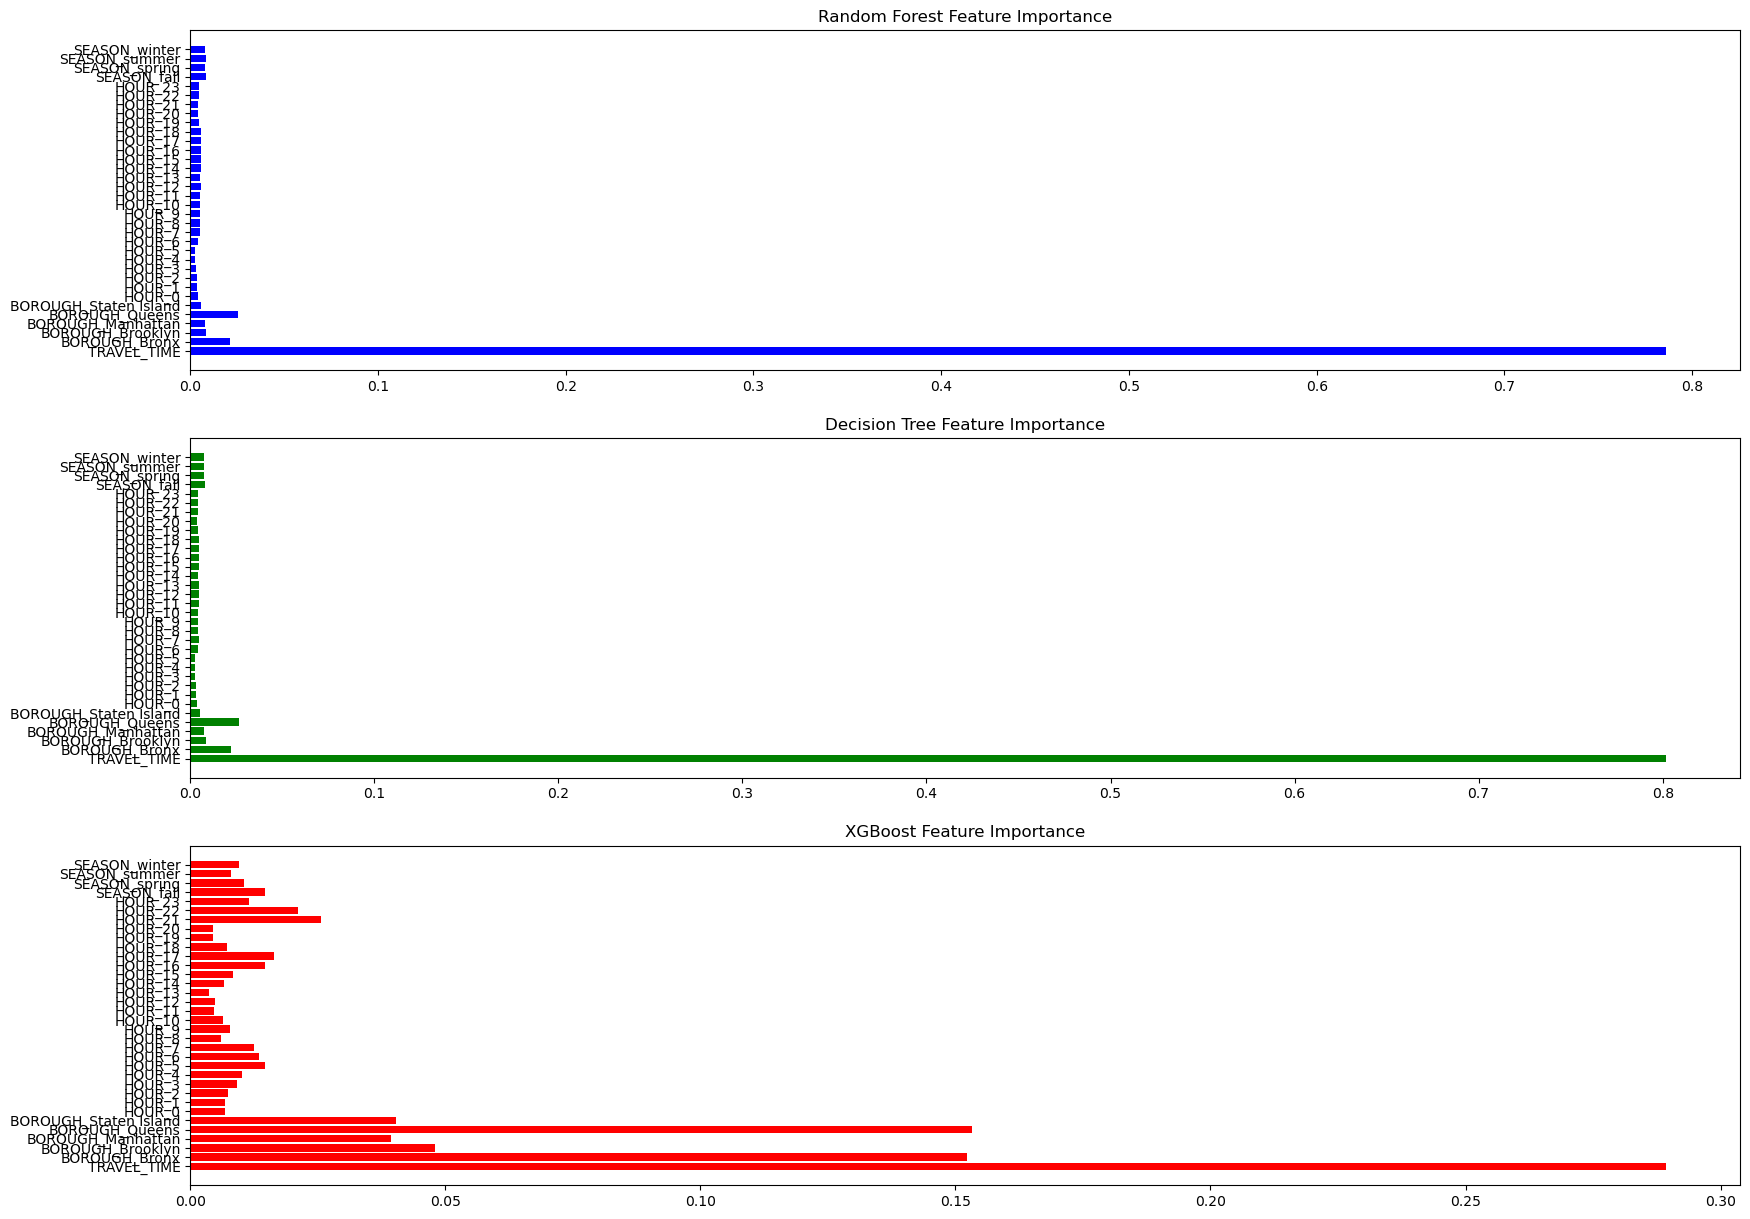

In [24]:
# Plotting feature importance
plt.figure(figsize=(20, 15))

plt.subplot(3,1,1)
plt.barh(rf_importance_df['feature'], rf_importance_df['importance'], color = 'b')
plt.title('Random Forest Feature Importance')

plt.subplot(3,1,2)
plt.barh(dt_importance_df['feature'], dt_importance_df['importance'], color = 'g')
plt.title('Decision Tree Feature Importance')

plt.subplot(3,1,3)
plt.barh(xgb_importance_df['feature'], xgb_importance_df['importance'], color = 'r')
plt.title('XGBoost Feature Importance')

plt.show()

In [21]:
#!pip install --upgrade arviz
#!pip install --upgrade packaging typing-extensions
#!pip install --upgrade pandas seaborn

  Using cached arviz-0.15.1-py3-none-any.whl (1.6 MB)
  Using cached xarray_einstats-0.5.1-py3-none-any.whl (28 kB)
  Using cached h5netcdf-1.1.0-py2.py3-none-any.whl (26 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 49.2.0.post20200714
    Uninstalling setuptools-49.2.0.post20200714:
      Successfully uninstalled setuptools-49.2.0.post20200714
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.0
    Uninstalling scipy-1.5.0:
      Successfully uninstalled scipy-1.5.0
  Attempting uninstall: arviz
    Found existing installation: arviz 0.11.0
    Uninstalling arviz-0.11.0:
      Successfully uninstalled arviz-0.11.0
Requirement already up-to-date: packaging in c:\programdata\anaconda3\lib\site-packages (23.1)
Requirement already up-to-date: typing-extensions in c:\programdata\anaconda3\lib\site-packages (4.5.0)
Requirement already up-to-date: pandas in c:\programdata\anaconda3\lib\site-packages (2.0.1)
Requirement already up-t

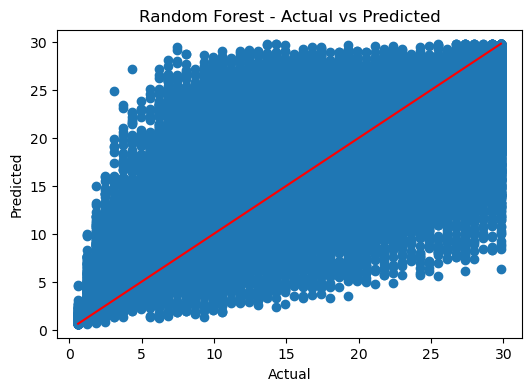

In [26]:
import seaborn as sns
# Plot the predicted vs actual values for the Random Forest model
plt.figure(figsize=(6,4))
plt.scatter(y_test, rf_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest - Actual vs Predicted')
plt.show()

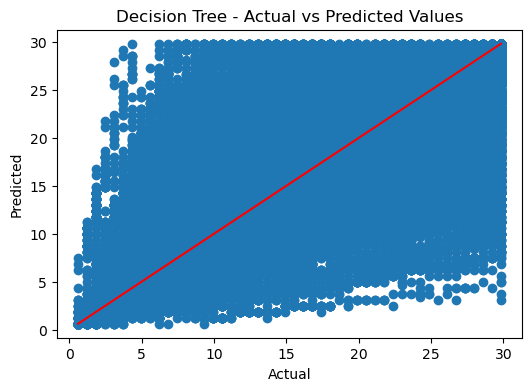

In [30]:
# Plot the predicted vs actual values for the Decision Tree model
plt.figure(figsize=(6,4))
plt.scatter(y_test, dt_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree - Actual vs Predicted Values')
plt.show()

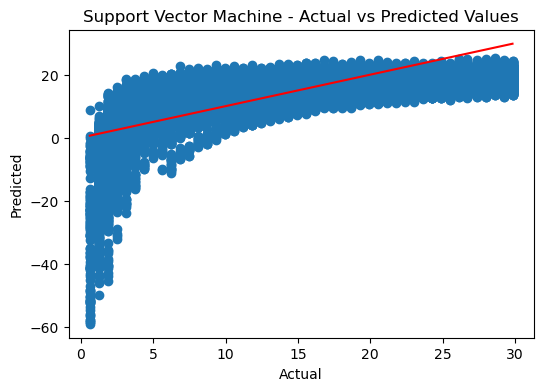

In [31]:
# Plot the predicted vs actual values for the SVM model
plt.figure(figsize=(6,4))
plt.scatter(y_test, svm_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Support Vector Machine - Actual vs Predicted Values')
plt.show()

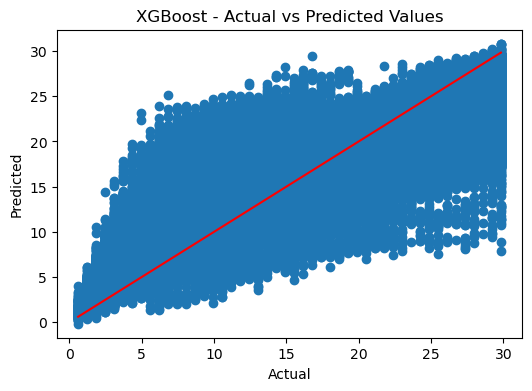

In [33]:
# Plot the predicted vs actual values for the XGBoost model
plt.figure(figsize=(6,4))
plt.scatter(y_test, xgb_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGBoost - Actual vs Predicted Values')
plt.show()

In [35]:
# Normalize the data
X = (X - X.mean()) / X.std()

# Perform PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)

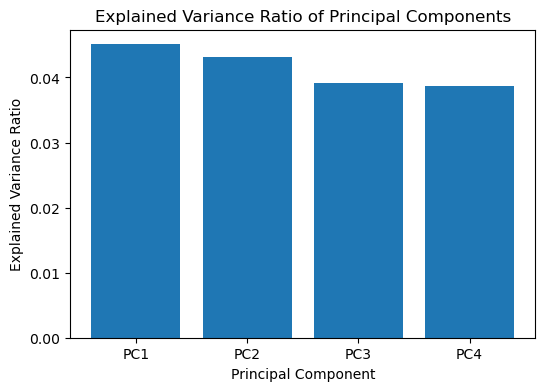

In [37]:
# Plot the explained variance ratio of the principal components
plt.figure(figsize=(6,4))
plt.bar(range(4), pca.explained_variance_ratio_)
plt.xticks(range(4), ['PC1', 'PC2','PC3','PC4'])
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.show()

In [39]:
# Train the models
rf_pca = RandomForestRegressor(n_estimators=100)
rf_pca.fit(X_train, y_train)

RandomForestRegressor()

In [40]:
dt_pca = DecisionTreeRegressor(random_state=42)
dt_pca.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [41]:
xgb_pca = XGBRegressor(random_state=42)
xgb_pca.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [42]:
rf_pred_pca = rf_pca.predict(X_test)
dt_pred_pca = dt_pca.predict(X_test)
xgb_pred_pca = xgb_pca.predict(X_test)

print('Random Forest - R2 score: {:.2f}, MAE: {:.2f}'.format(r2_score(y_test, rf_pred_pca), mean_absolute_error(y_test, rf_pred_pca)))
print('Decision Tree - R2 score: {:.2f}, MAE: {:.2f}'.format(r2_score(y_test, dt_pred_pca), mean_absolute_error(y_test, dt_pred_pca)))
print('XGBoost - R2 score: {:.2f}, MAE: {:.2f}'.format(r2_score(y_test, xgb_pred_pca), mean_absolute_error(y_test, xgb_pred_pca)))

Random Forest - R2 score: 0.55, MAE: 3.77
Decision Tree - R2 score: 0.43, MAE: 4.06
XGBoost - R2 score: 0.61, MAE: 3.98


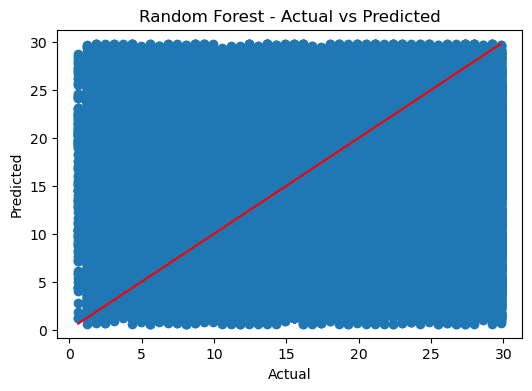

In [47]:
# Plot the predicted vs actual values for the Random Forest model
plt.figure(figsize=(6,4))
plt.scatter(y_test, rf_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest - Actual vs Predicted')
plt.show()

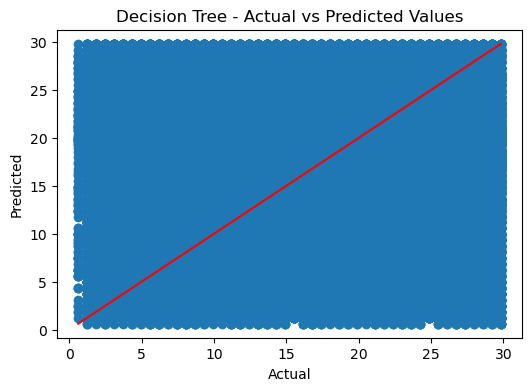

In [48]:
# Plot the predicted vs actual values for the Decision Tree model
plt.figure(figsize=(6,4))
plt.scatter(y_test, dt_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree - Actual vs Predicted Values')
plt.show()

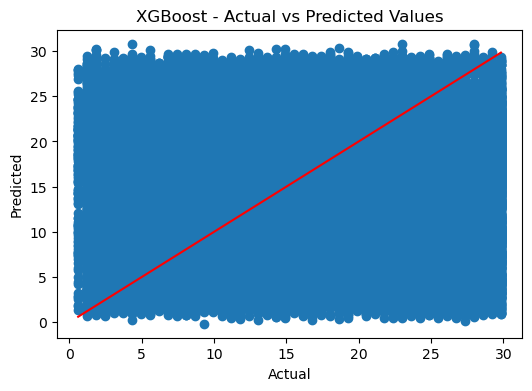

In [49]:
# Plot the predicted vs actual values for the XGBoost model
plt.figure(figsize=(6,4))
plt.scatter(y_test, xgb_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGBoost - Actual vs Predicted Values')
plt.show()